<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

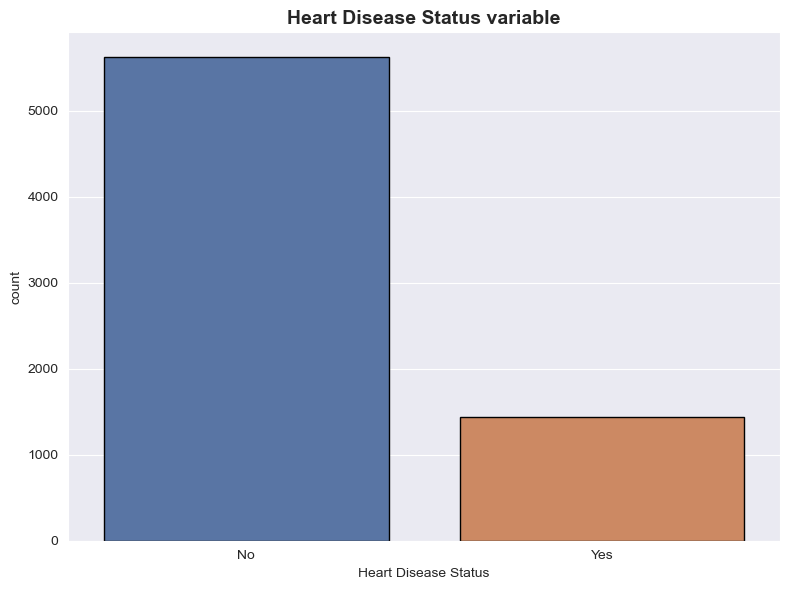

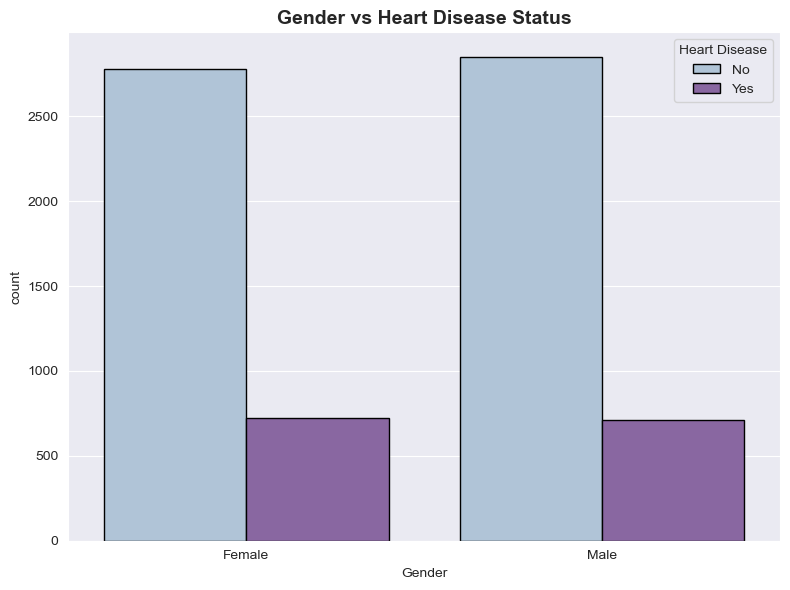

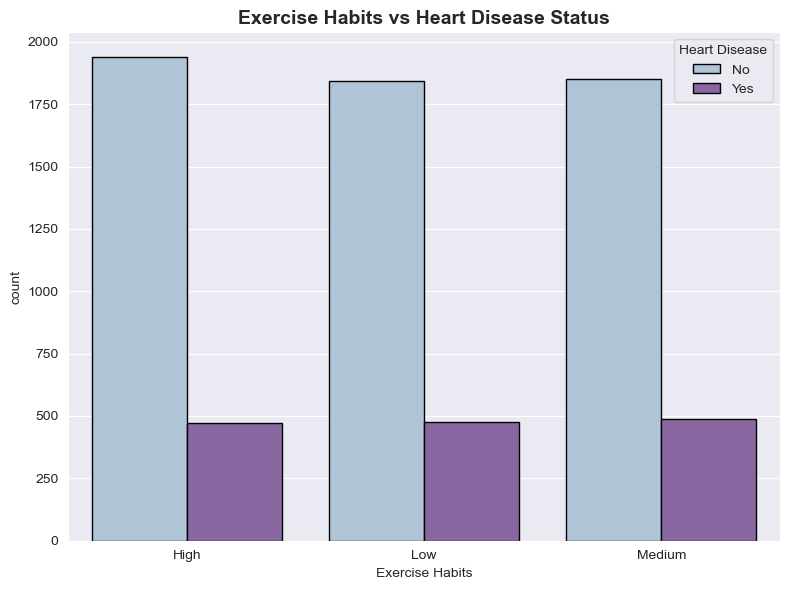

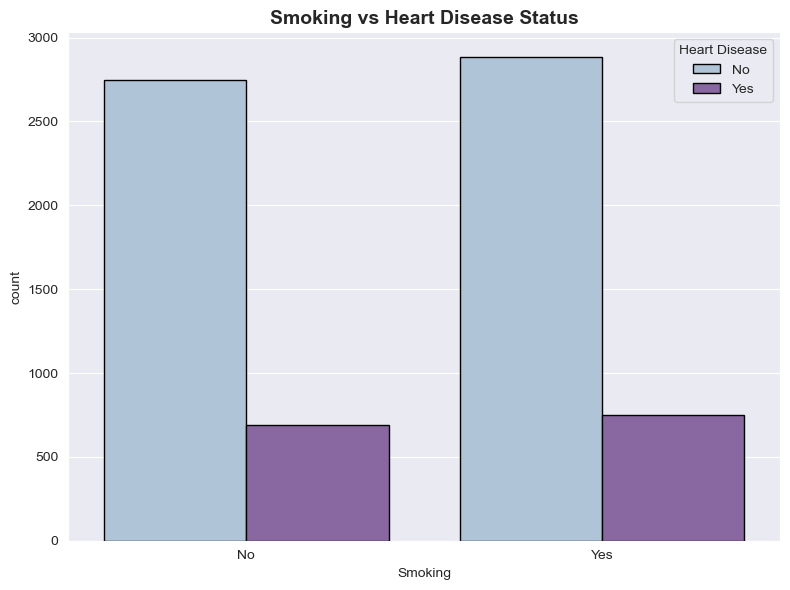

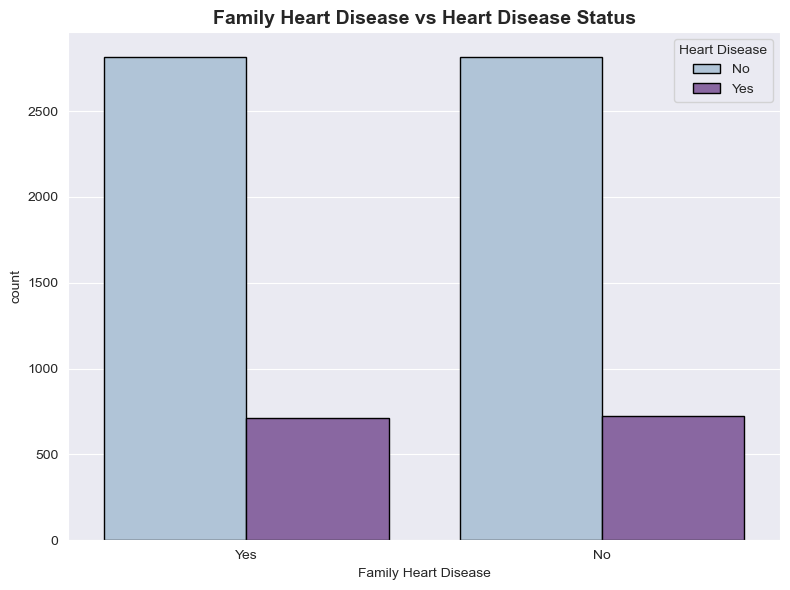

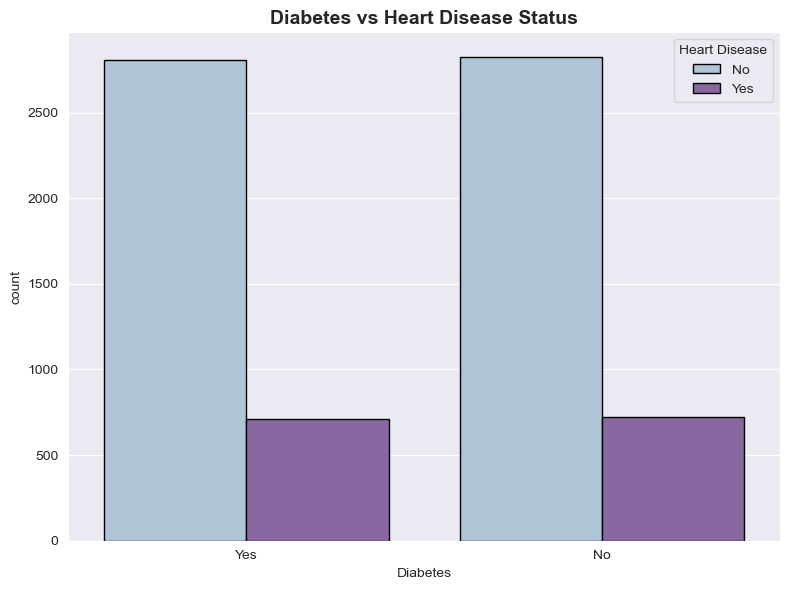

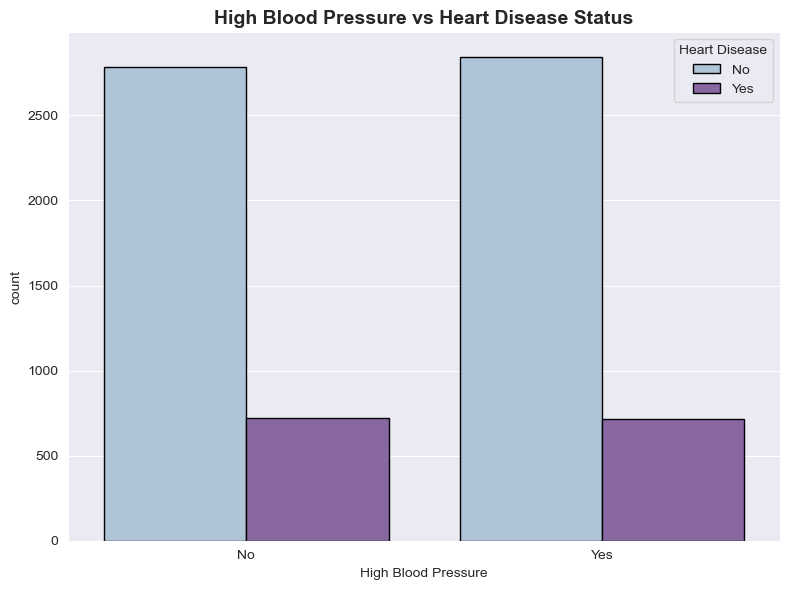

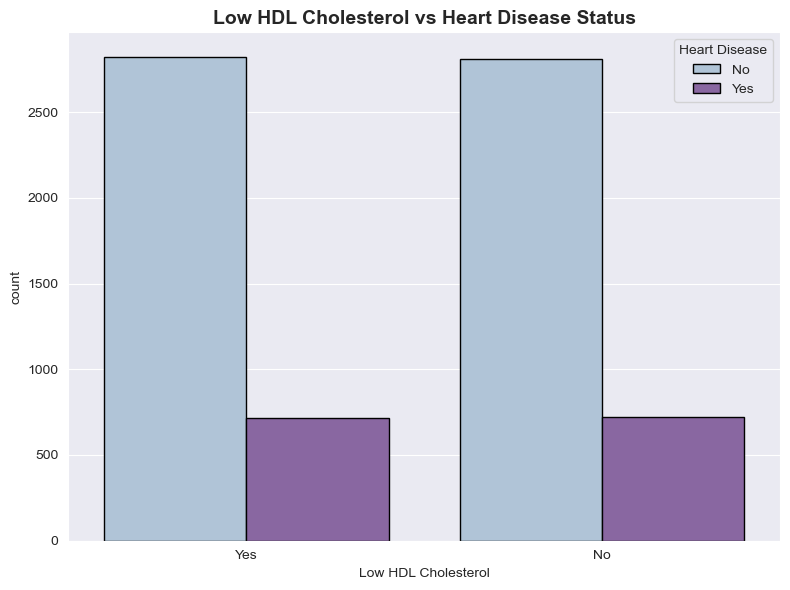

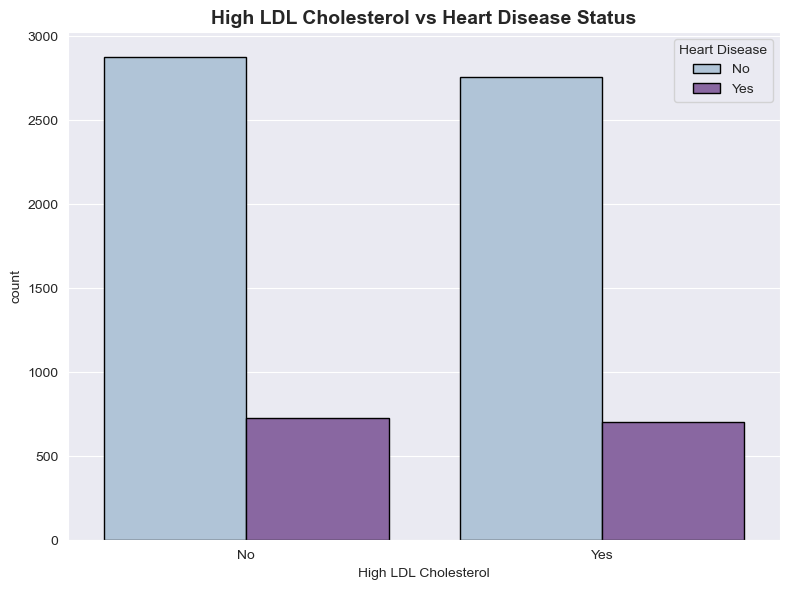

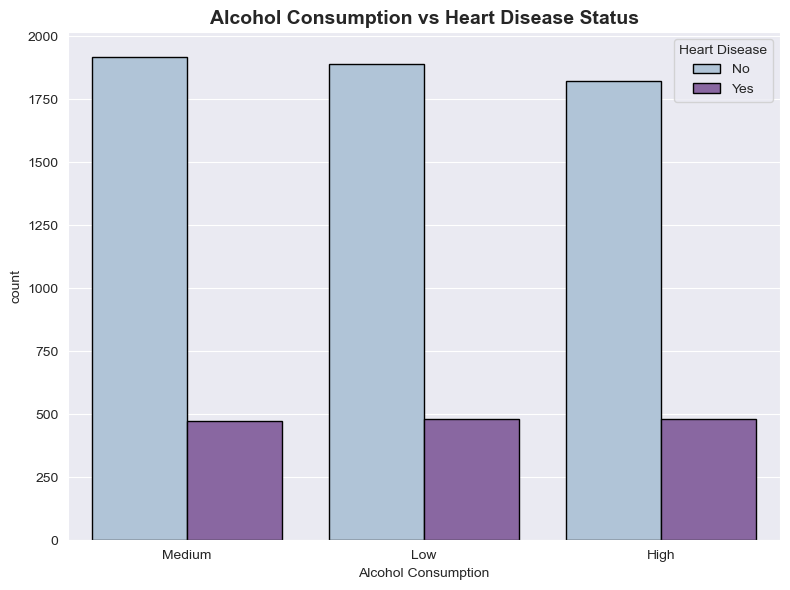

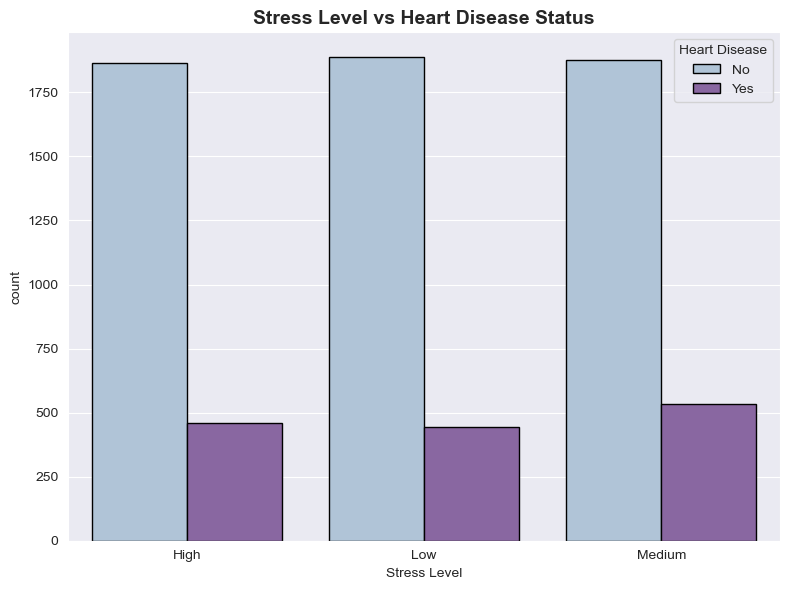

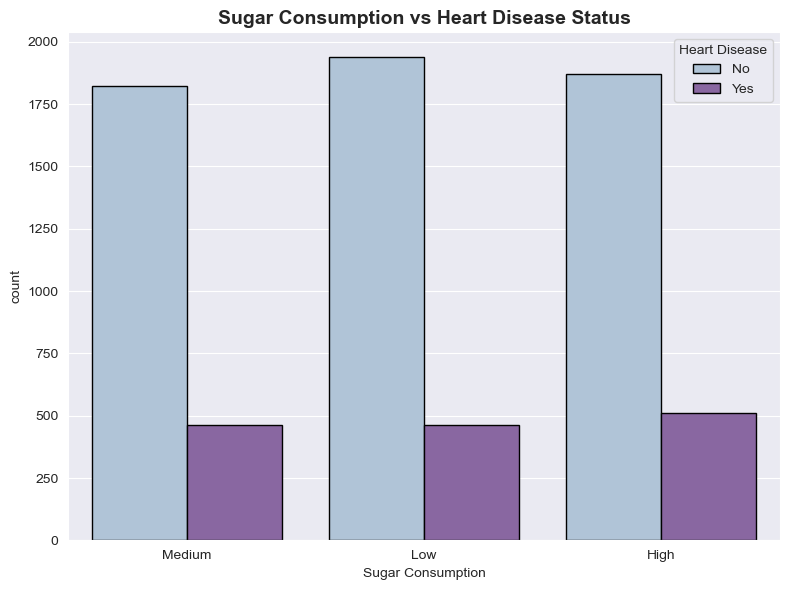

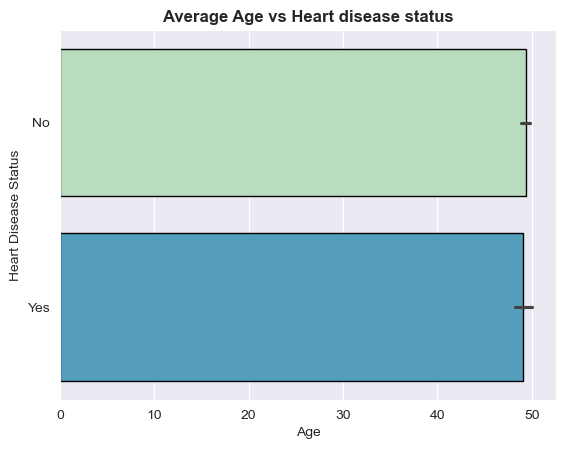

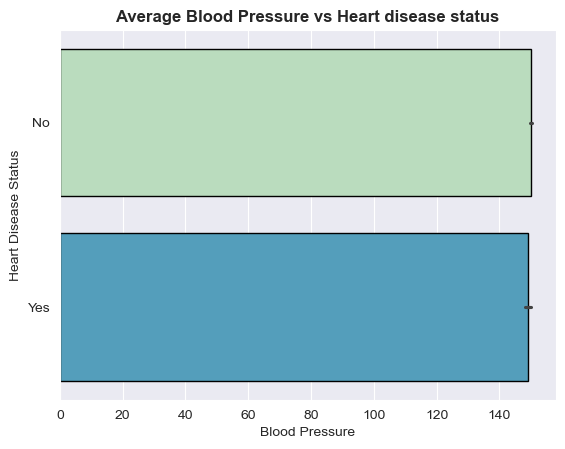

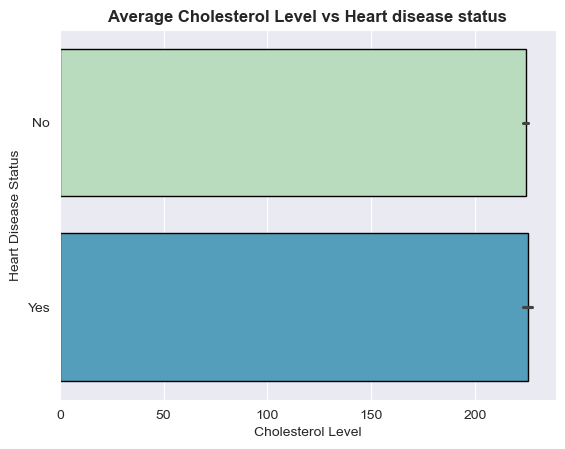

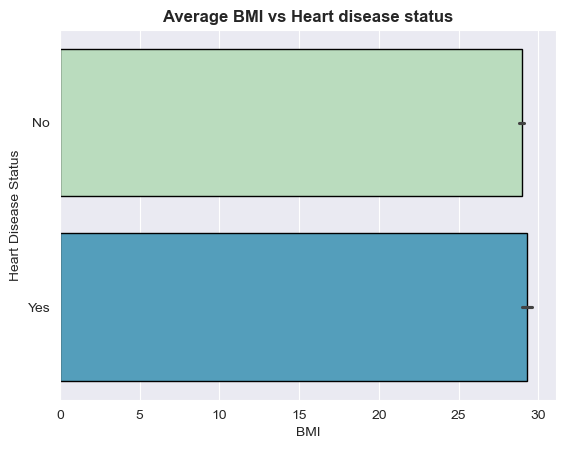

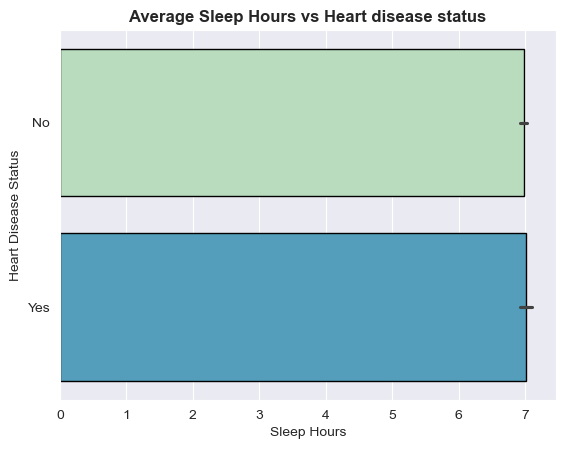

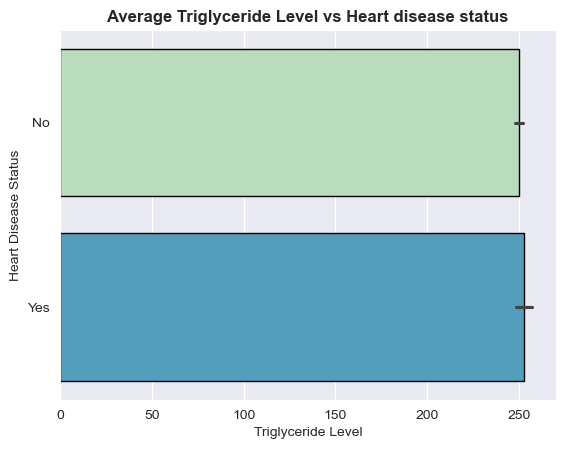

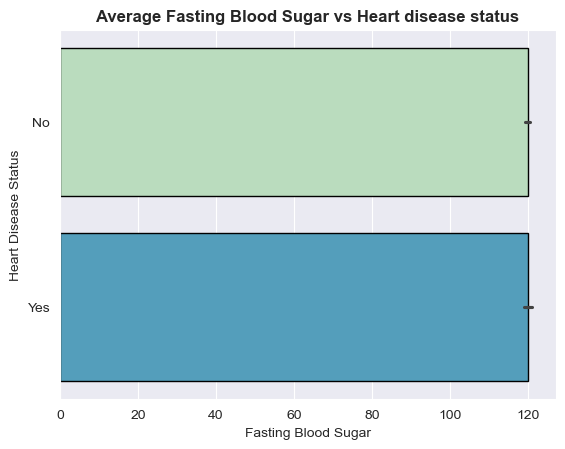

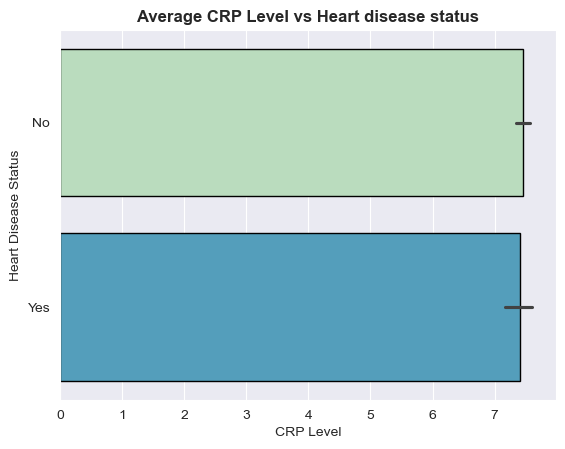

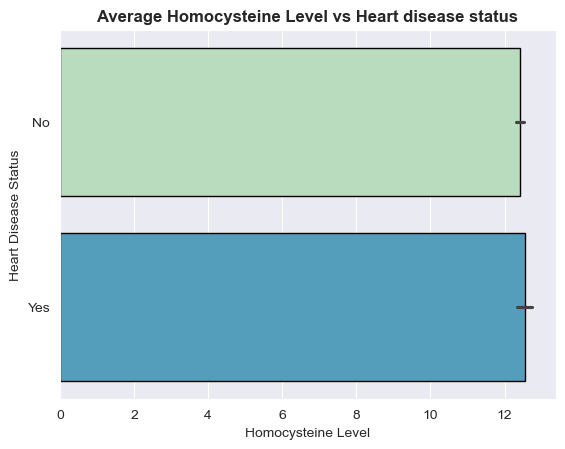

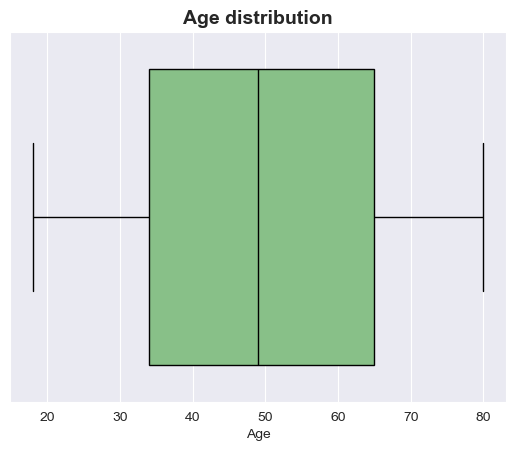

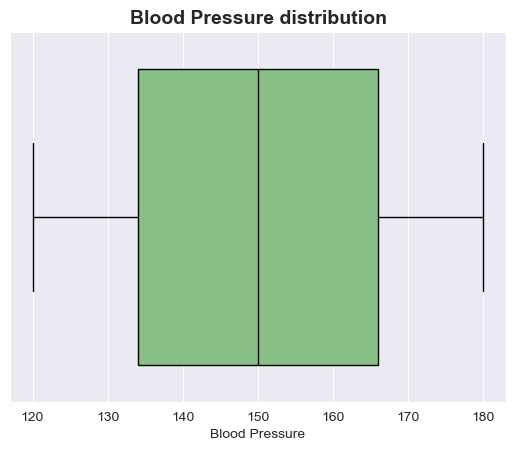

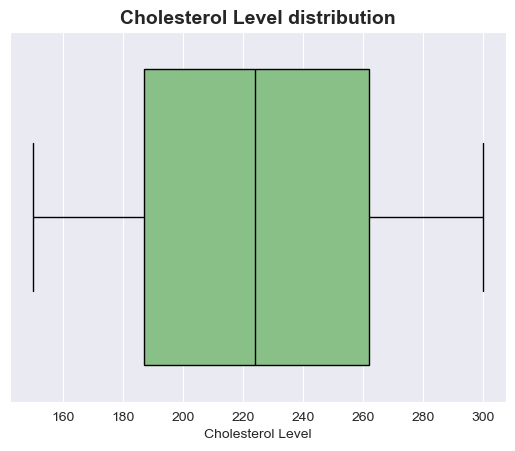

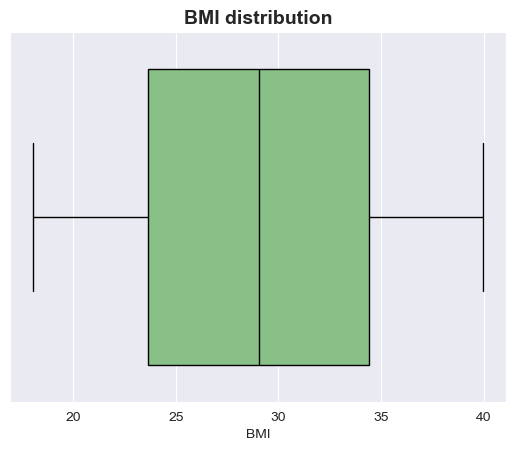

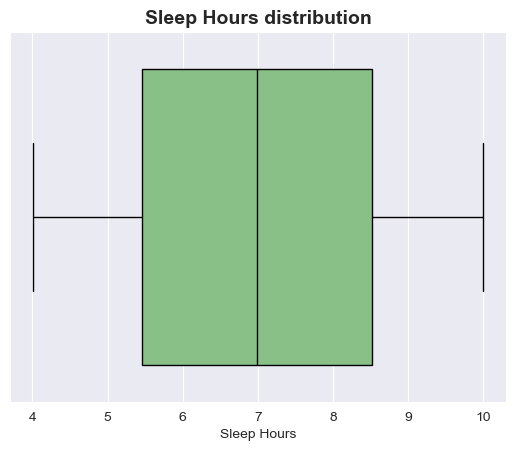

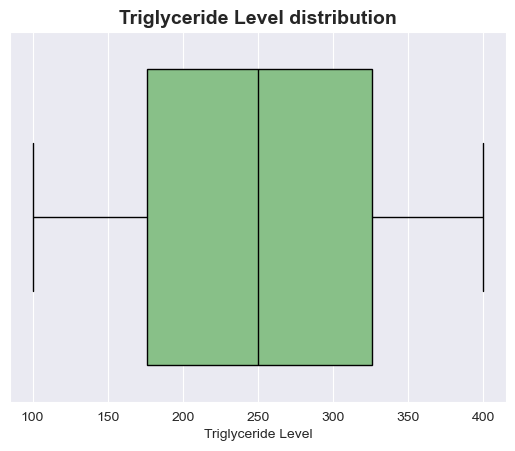

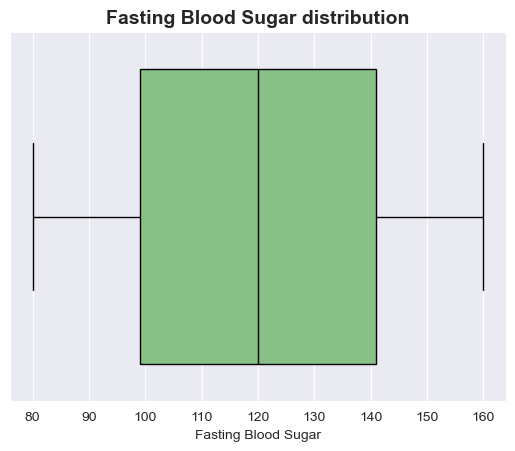

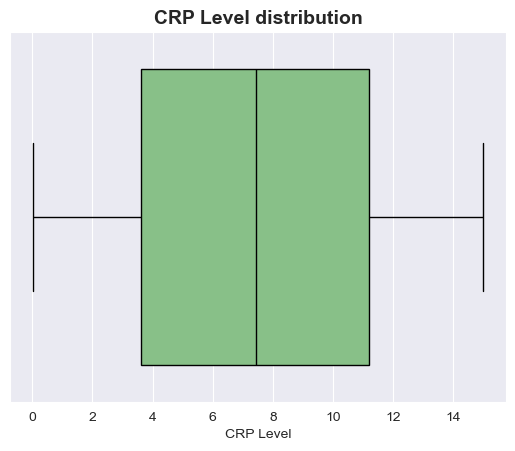

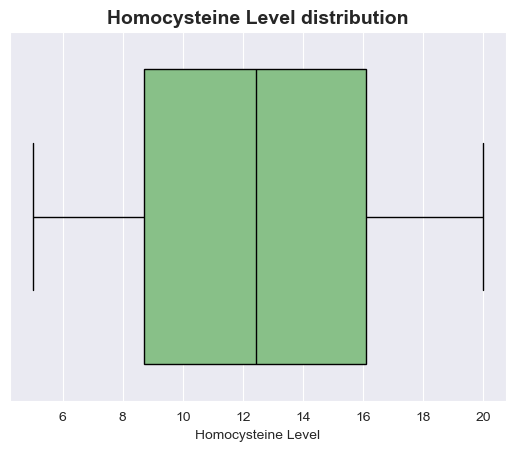

<class 'pandas.core.frame.DataFrame'>
Index: 7067 entries, 1 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       7067 non-null   float64
 1   Blood Pressure            7067 non-null   float64
 2   Cholesterol Level         7067 non-null   float64
 3   BMI                       7067 non-null   float64
 4   Sleep Hours               7067 non-null   float64
 5   Triglyceride Level        7067 non-null   float64
 6   Fasting Blood Sugar       7067 non-null   float64
 7   CRP Level                 7067 non-null   float64
 8   Homocysteine Level        7067 non-null   float64
 9   Heart Disease Status      7067 non-null   int64  
 10  Gender_Male               7067 non-null   float64
 11  Smoking_Yes               7067 non-null   float64
 12  Family Heart Disease_Yes  7067 non-null   float64
 13  Diabetes_Yes              7067 non-null   float64
 14  High Blood Pr

In [1]:
# Load prep notebook
%run Heart_disease_prep.ipynb

In [2]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, LearningCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, f_classif

from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler

from sklearn.inspection import permutation_importance

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score

In [3]:
# View model dataframe
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7067 entries, 1 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       7067 non-null   float64
 1   Blood Pressure            7067 non-null   float64
 2   Cholesterol Level         7067 non-null   float64
 3   BMI                       7067 non-null   float64
 4   Sleep Hours               7067 non-null   float64
 5   Triglyceride Level        7067 non-null   float64
 6   Fasting Blood Sugar       7067 non-null   float64
 7   CRP Level                 7067 non-null   float64
 8   Homocysteine Level        7067 non-null   float64
 9   Heart Disease Status      7067 non-null   int64  
 10  Gender_Male               7067 non-null   float64
 11  Smoking_Yes               7067 non-null   float64
 12  Family Heart Disease_Yes  7067 non-null   float64
 13  Diabetes_Yes              7067 non-null   float64
 14  High Blood Pr

## Function list

In [4]:
# Randomized search cv function
def model_search(estimator, params, X, y):
    search = RandomizedSearchCV(
        estimator = estimator,
        param_distributions = params,
        scoring = 'f1',
        cv = 5,
        random_state = 42
    )
    search.fit(X, y)
    return search.best_estimator_

# Learning curve function
def plot_learning_curve(estimator, X, y, name, cv = 5, scoring = 'f1', num_points = 20):
    train_sizes, train_scores, test_scores = learning_curve(
    estimator = estimator,
    X = X,
    y = y,
    train_sizes = np.linspace(0.1, 1.0, num_points),
    cv = cv,
    scoring = scoring,
    )

    display = LearningCurveDisplay(
    train_sizes = train_sizes,
    train_scores = train_scores, 
    test_scores = test_scores, 
    score_name = 'f1'
    )

    plt.figure(figsize = (8, 6))
    display.plot(line_kw = {'marker': 'o'}, fill_between_kw = {'alpha': 0.3})
    plt.title(f'Learning Curve - {name}', fontsize = 14, fontweight = 'bold')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Cross validation score function
def cross_validation(model, x, y):
    cv_score = cross_val_score(model, x, y, cv = 5, scoring  = 'f1')
    print(f'Cross validation f1 score is {cv_score.mean().round(3)} and standard deviation is {cv_score.std().round(3)}')

# Prediction function
def predictor(model, x, y):
    prediction = model.predict(x)
    prediction_probability = model.predict_proba(x)
    score = model.score(x, y)
    return [prediction, prediction_probability, score]

# Classification report function
def report(test, prediction):
    model_report = metrics.classification_report(test, prediction, target_names = ['No heart disease', 'Has heart disease'])
    print(model_report)

# Precision recall function
def plot_recall_precision(test, prediction_prob, name):
    plt.figure(figsize = (8, 6))
    PrecisionRecallDisplay.from_predictions(test, prediction_prob, plot_chance_level = True, name = name)
    plt.title(f'Precision recall curve {name}', fontsize = 14, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

# ROC AUC curve function
def plot_ROC(test, prediction_prob, name):
    plt.figure(figsize = (8, 6))
    RocCurveDisplay.from_predictions(test, prediction_prob, name = name)
    plt.title(f'ROC curve {name}', fontsize = 14, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

# Confusion matrix
def plot_matrix(test, predictions, title):
    plt.figure(figsize = (8, 6))
    ConfusionMatrixDisplay.from_predictions(test, 
                                            predictions, 
                                            display_labels = ['No heart disease', 'Has heart disease'],
                                            cmap = 'PuBu',
                                            )
    plt.title(f'Confusion matrix {title}', fontsize = 14, fontweight = 'bold')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

## Train test split

In [5]:
# Define X and y variable
X = df_model.drop('Heart Disease Status', axis = 1)
y = df_model['Heart Disease Status']

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (4946, 20)
Shape of X_test: (2121, 20)
Shape of y_train: (4946,)
Shape of y_test: (2121,)


## Imbalance

In [8]:
# Target variable is heavily imbalanced
print(y_train.value_counts())
print()
print(y_test.value_counts())

Heart Disease Status
0    3956
1     990
Name: count, dtype: int64

Heart Disease Status
0    1676
1     445
Name: count, dtype: int64


In [9]:
# Rebalance the target variable - Training set only
rus = RandomUnderSampler(sampling_strategy = 'auto', random_state = 42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
print(f'Resample X_train shape:{X_train_res.shape}')
print()
print(y_train_res.value_counts())

Resample X_train shape:(1980, 20)

Heart Disease Status
0    990
1    990
Name: count, dtype: int64


## Scale features

In [10]:
# Scale the data for model fitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

## Feature Selection

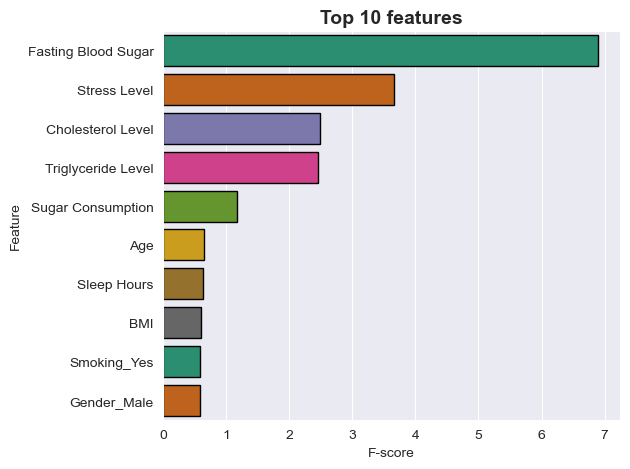

In [11]:
# Select features - SelectKBest
selector = SelectKBest(score_func = f_classif, k = 10)
X_train_sel = selector.fit_transform(X_train_scaled, y_train_res)
X_test_sel = selector.transform(X_test_scaled)

# Declare score and p-values
score = selector.scores_.round(2)
p_values = selector.pvalues_.round(4)
mask = selector.get_support()

# Create new dataframe for selected features
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'F-score': score,
    'p-value': p_values,
    'Selected': mask
})

final_features = selected_features[selected_features['Selected']].sort_values(by = 'F-score', ascending=False)

sns.barplot(
    data = final_features,
    x = 'F-score',
    y = 'Feature',
    edgecolor = 'black',
    palette = 'Dark2'
)
plt.title('Top 10 features', fontweight = 'bold', fontsize = 14)
plt.tight_layout()
plt.show()

## Model One - Logistic Regression

In [12]:
# Declare logistic regression
lr_list = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400]
}

lr = LogisticRegression(random_state = 42)

# Fit model to training set
clf1 = model_search(lr, lr_list, X_train_sel, y_train_res)
fit_clf1 = clf1.fit(X_train_sel, y_train_res)

In [13]:
# CV score - Logistic Regression
cross_validation(clf1, X_train_sel, y_train_res)

Cross validation f1 score is 0.5 and standard deviation is 0.027


<Figure size 800x600 with 0 Axes>

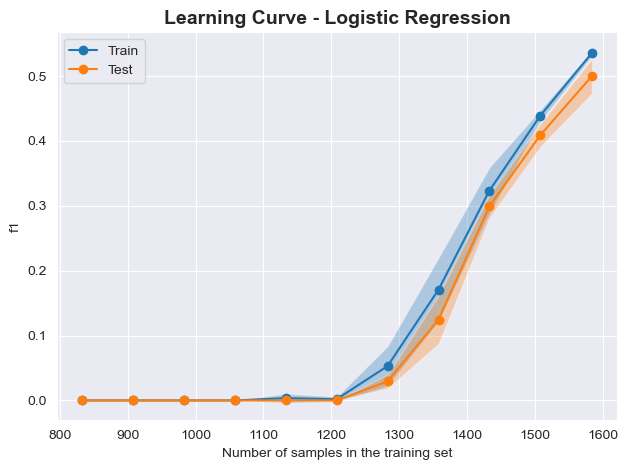

In [14]:
# Learning curve - Logistic Regression
plot_learning_curve(clf1, X_train_sel, y_train_res, 'Logistic Regression')

In [15]:
# Predict Logistic Regression on test data
lr_predictor = predictor(fit_clf1, X_test_sel, y_test)
print(f'Logistic Regression score on test set: {round(lr_predictor[2],3)}')

Logistic Regression score on test set: 0.496


In [16]:
# Classification report - Logistic Regression
report(y_test, lr_predictor[0])

                   precision    recall  f1-score   support

 No heart disease       0.78      0.51      0.61      1676
Has heart disease       0.20      0.45      0.27       445

         accuracy                           0.50      2121
        macro avg       0.49      0.48      0.44      2121
     weighted avg       0.66      0.50      0.54      2121



<Figure size 800x600 with 0 Axes>

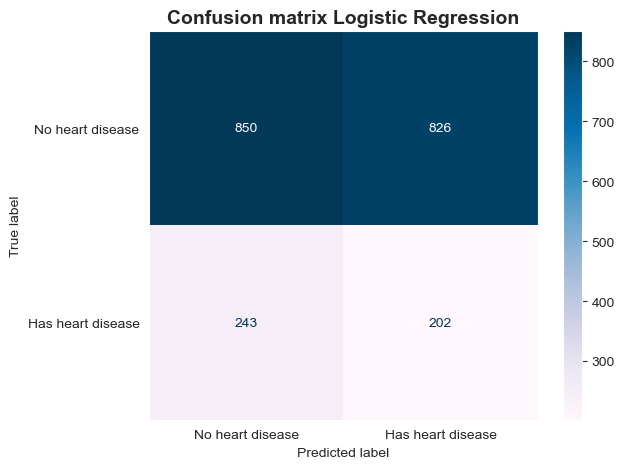

In [17]:
# Confusion matrix - Logsitic Regression
plot_matrix(y_test, lr_predictor[0], 'Logistic Regression')

<Figure size 800x600 with 0 Axes>

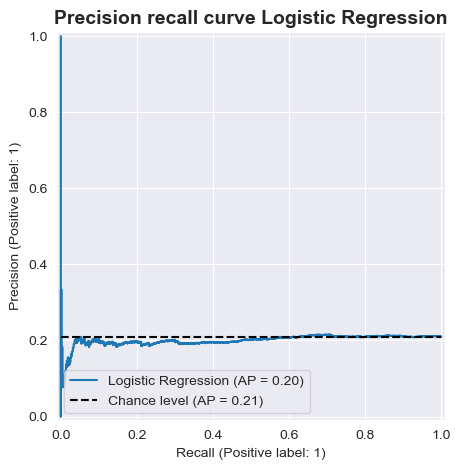

In [18]:
# PrecisionRecall plot - Logistic Regression
plot_recall_precision(y_test, lr_predictor[1][:,1], 'Logistic Regression')

<Figure size 800x600 with 0 Axes>

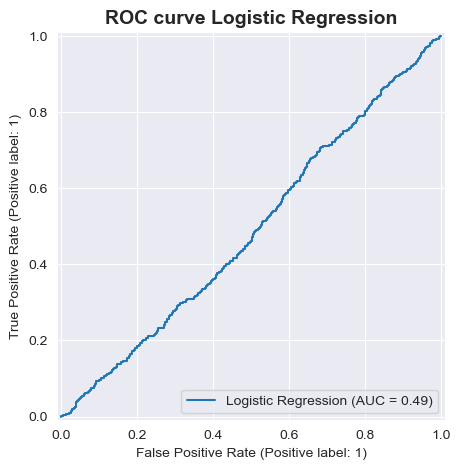

In [19]:
# ROC AUC curve plot - Logistic Regression
plot_ROC(y_test, lr_predictor[1][:,1], 'Logistic Regression')

## Model Two - Gradient Boosting classifer

In [20]:
# Declare gradient boosting classifier
gbc_list = {
    'loss': ['log_loss', 'exponential'],
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2']
}

# Use base estimator logistic regression for init
gbc = GradientBoostingClassifier(init = lr, random_state = 42)

# Fit model to training set
clf2 = model_search(gbc, gbc_list, X_train_sel, y_train_res)
fit_clf2 = clf2.fit(X_train_sel, y_train_res)

In [21]:
# CV score - Gradient Boosting Classifier
cross_validation(clf2, X_train_sel, y_train_res)

Cross validation f1 score is 0.518 and standard deviation is 0.021


<Figure size 800x600 with 0 Axes>

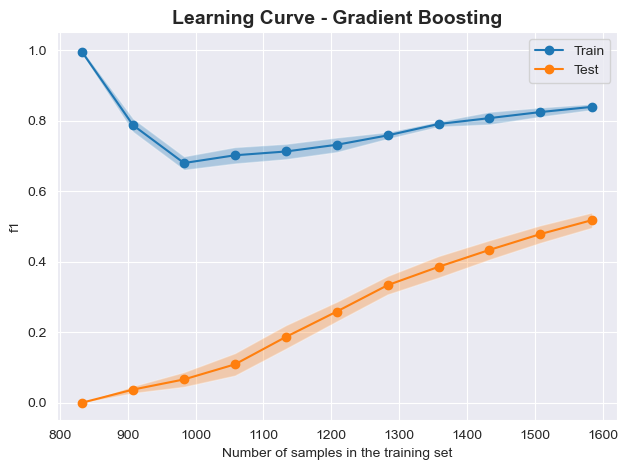

In [22]:
# Learning curve - Gradient Boosting classifier
plot_learning_curve(clf2, X_train_sel, y_train_res, 'Gradient Boosting')

In [23]:
# Predict Boosting classifer on test data
gbc_predictor = predictor(fit_clf2, X_test_sel, y_test)
print(f'Gradient Boosting score on test set: {round(gbc_predictor[2],3)}')

Gradient Boosting score on test set: 0.49


In [24]:
# Classification report - Boosting classifier
report(y_test, gbc_predictor[0])

                   precision    recall  f1-score   support

 No heart disease       0.78      0.49      0.60      1676
Has heart disease       0.20      0.49      0.29       445

         accuracy                           0.49      2121
        macro avg       0.49      0.49      0.45      2121
     weighted avg       0.66      0.49      0.54      2121



<Figure size 800x600 with 0 Axes>

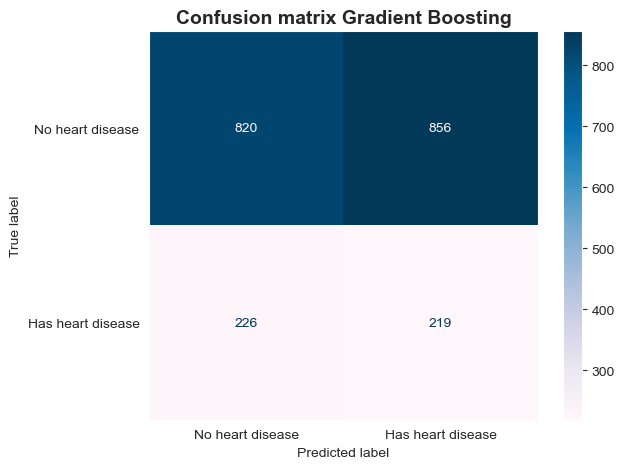

In [25]:
# Confusion matrix - Logsitic Regression
plot_matrix(y_test, gbc_predictor[0], 'Gradient Boosting')

<Figure size 800x600 with 0 Axes>

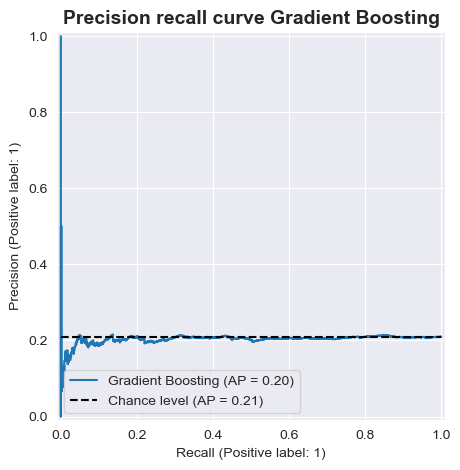

In [26]:
# PrecisionRecall plot - Gradient Boosting
plot_recall_precision(y_test, gbc_predictor[1][:,1], 'Gradient Boosting')

<Figure size 800x600 with 0 Axes>

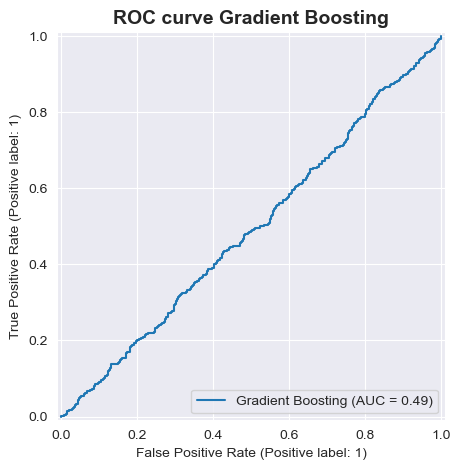

In [27]:
# ROC AUC curve plot - Gradient Boosting
plot_ROC(y_test, gbc_predictor[1][:,1], 'Gradient Boosting')

## Model Three - Random Forest Classifier

In [28]:
# Declare random forest classifier
rf_list = {
    'n_estimators': [100, 200, 300, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Use base estimator logistic regression for init
rf = RandomForestClassifier(random_state = 42)

# Fit model to training set
clf3 = model_search(rf, rf_list, X_train_sel, y_train_res)
fit_clf3 = clf3.fit(X_train_sel, y_train_res)

In [29]:
# CV score - Random Forest Classifier
cross_validation(clf3, X_train_sel, y_train_res)

Cross validation f1 score is 0.509 and standard deviation is 0.036


<Figure size 800x600 with 0 Axes>

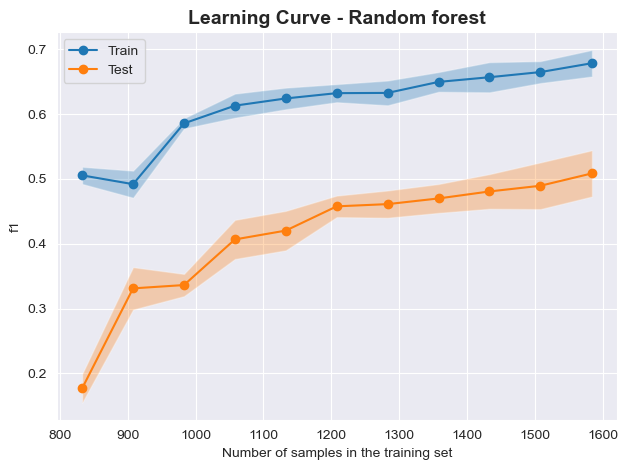

In [30]:
# Learning curve - Random forest classifier
plot_learning_curve(clf3, X_train_sel, y_train_res, 'Random forest')

In [31]:
# Predict random forest on test data
rf_predictor = predictor(fit_clf3, X_test_sel, y_test)
print(f'Gradient Boosting score on test set: {round(rf_predictor[2],3)}')

Gradient Boosting score on test set: 0.498


In [32]:
# Classification report - Random Forest
report(y_test, rf_predictor[0])

                   precision    recall  f1-score   support

 No heart disease       0.77      0.51      0.62      1676
Has heart disease       0.19      0.44      0.27       445

         accuracy                           0.50      2121
        macro avg       0.48      0.48      0.44      2121
     weighted avg       0.65      0.50      0.54      2121



<Figure size 800x600 with 0 Axes>

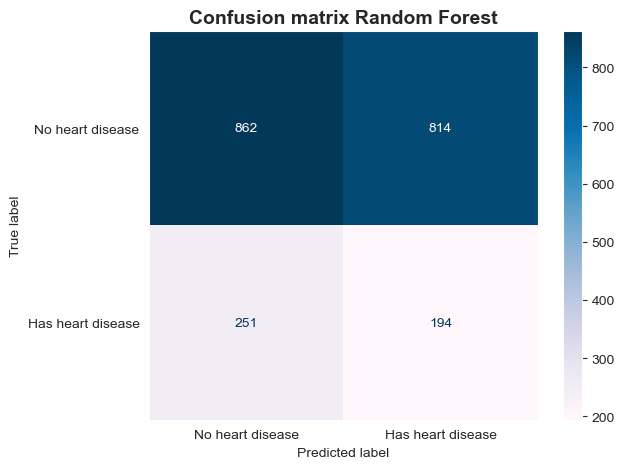

In [33]:
# Confusion matrix - Random Forest
plot_matrix(y_test, rf_predictor[0], 'Random Forest')

<Figure size 800x600 with 0 Axes>

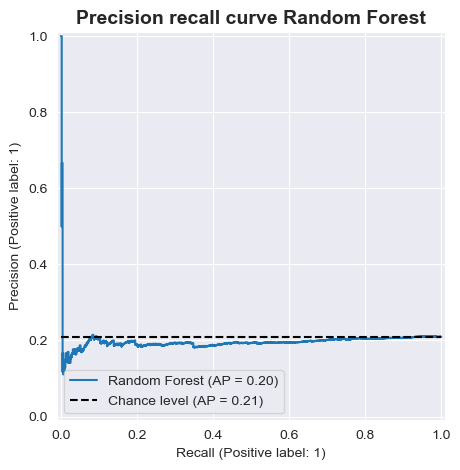

In [34]:
# PrecisionRecall plot - Random Forest
plot_recall_precision(y_test, rf_predictor[1][:,1], 'Random Forest')

<Figure size 800x600 with 0 Axes>

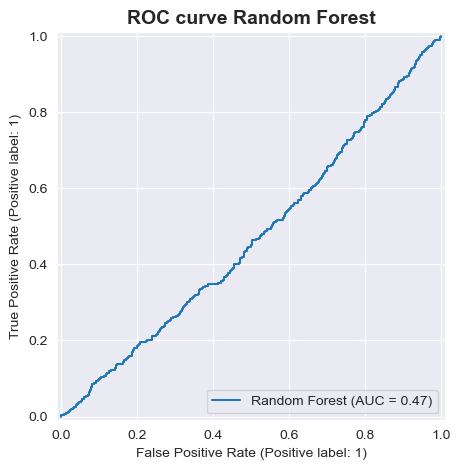

In [35]:
# ROC AUC curve plot - Random Forest
plot_ROC(y_test, rf_predictor[1][:,1], 'Random Forest')

## Final evaluation

In [36]:
# Final metrics function
def get_metrics(actual, prediction, probability):
    return {
        'F1': f1_score(actual, prediction),
        'Precision': precision_score(actual, prediction),
        'Recall': recall_score(actual, prediction),
        'ROC AUC': roc_auc_score(actual, probability[:,1]),
        'PR AUC': average_precision_score(actual, probability[:,1])
    }

In [37]:
results = {
    'Logistic Regression': get_metrics(y_test, lr_predictor[0], lr_predictor[1]),
    'Boosting': get_metrics(y_test, gbc_predictor[0], gbc_predictor[1]),
    'Random Forest': get_metrics(y_test, rf_predictor[0], rf_predictor[1])
}

final_results_df = pd.DataFrame(results).T.round(3)
final_results_df.style.highlight_max(color = 'lightgreen', axis = 0)

,F1,Precision,Recall,ROC AUC,PR AUC
Logistic Regression,0.274000,0.196000,0.454000,0.488000,0.202000
Boosting,0.288000,0.204000,0.492000,0.491000,0.205000
Random Forest,0.267000,0.192000,0.436000,0.468000,0.199000


In [38]:
# Calculate permutation importance on test set
result = permutation_importance(
    clf2,              
    X_test_sel,        
    y_test,            
    n_repeats = 10,
    random_state = 42,
    scoring = 'f1'
)

original_feature_names = list(X.columns)
selected_names = [name for name, keep in zip(original_feature_names, mask) if keep]

# Importance dataframe
importance_df = pd.DataFrame({
    'Feature': selected_names,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by = 'Importance Mean', ascending = False)

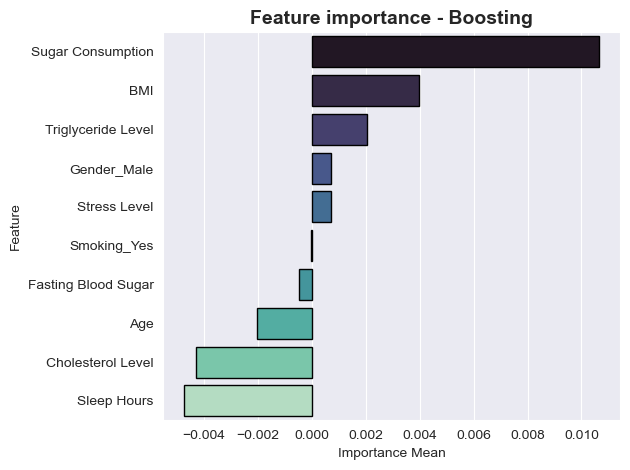

In [39]:
# Plot the results of feature importance
sns.barplot(
    data = importance_df,
    x = 'Importance Mean',
    y = 'Feature',
    edgecolor = 'black',
    palette = 'mako'
)
plt.title('Feature importance - Boosting', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

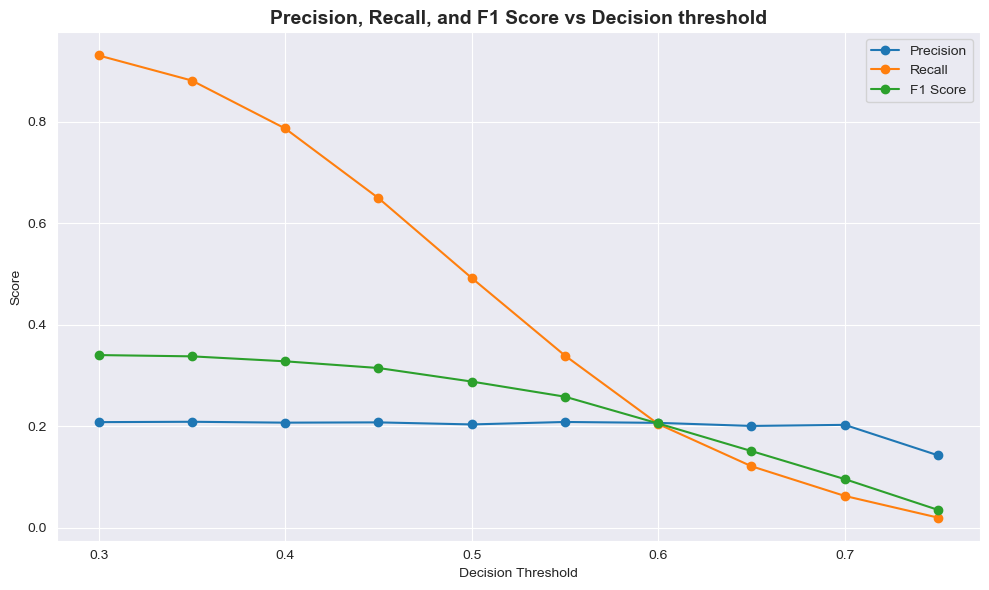

In [40]:
# Decison threshold
thresholds = np.arange(0.3, 0.8, 0.05)

# Initialise empty lists
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred = (gbc_predictor[1][:,1] >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

plt.figure(figsize = (10, 6))
plt.plot(thresholds, precisions, label = 'Precision', marker = 'o')
plt.plot(thresholds, recalls, label = 'Recall', marker = 'o')
plt.plot(thresholds, f1s, label = 'F1 Score', marker='o')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Decision threshold', fontweight = 'bold', fontsize = 14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()